In [22]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
import copy
from IPython import display
import pylab as pl
from multiprocess.pool import ThreadPool


In [23]:
import yal

modules = yal.read('./yal_files/ami33.yal')

# modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

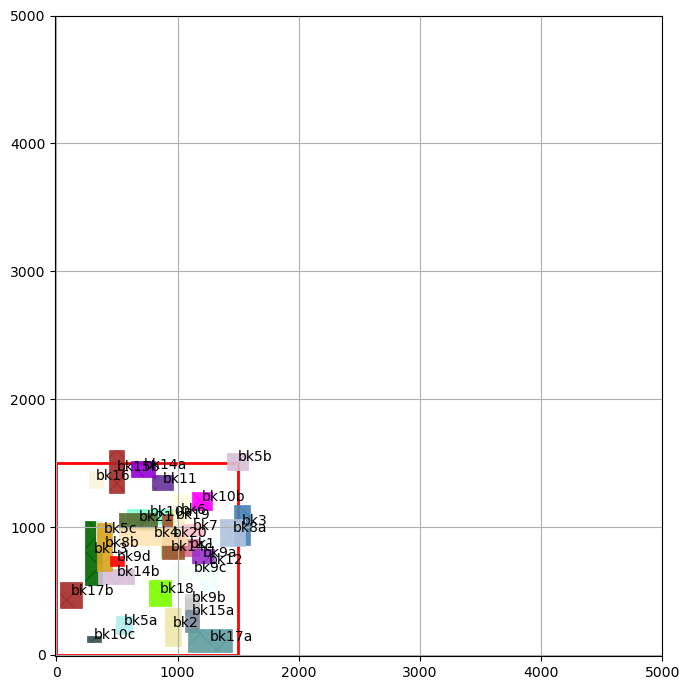

In [24]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 1500,     #8000
               "height" : 1500}     #8000

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 5000, 5000)

In [25]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


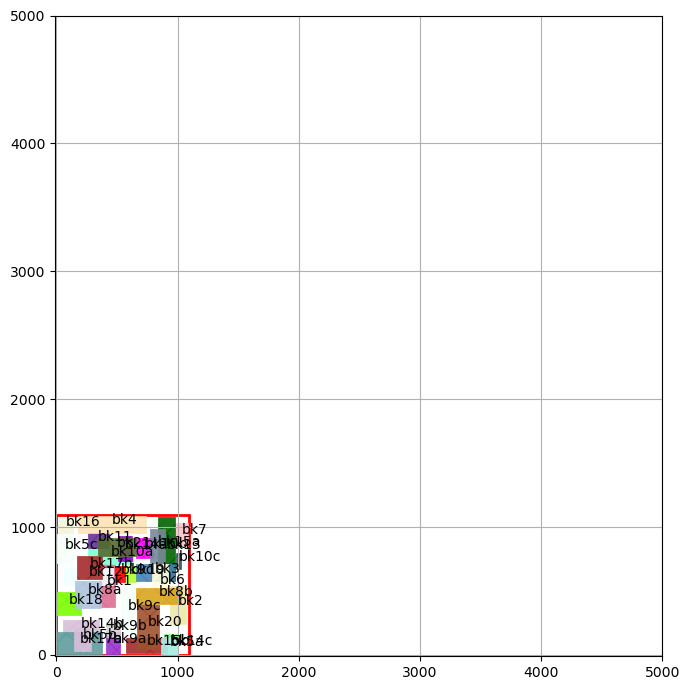

One Round of Interaction took: 6.947813510894775 seconds
{'bk1': 'swap with bk14a', 'bk10a': 'pair with bk9d', 'bk10b': 'pair with bk9a', 'bk10c': 'pair with bk7', 'bk11': 'swap with bk9d', 'bk12': 'budge', 'bk13': 'center', 'bk14a': 'swap with bk2', 'bk14b': 'swap with bk12', 'bk14c': 'budge', 'bk15a': 'swap with bk9b', 'bk15b': 'swap with bk14c', 'bk16': 'center', 'bk17a': 'swap with bk3', 'bk17b': 'swap with bk14c', 'bk18': 'swap with bk3', 'bk19': 'budge', 'bk2': 'swap with bk21', 'bk20': 'swap with bk18', 'bk21': 'swap with bk15a', 'bk3': 'swap with bk9a', 'bk4': 'center', 'bk5a': 'hustle', 'bk5b': 'center', 'bk5c': 'swap with bk8a', 'bk6': 'swap with bk5a', 'bk7': 'center', 'bk8a': 'swap with bk5a', 'bk8b': 'swap with bk5b', 'bk9a': 'pair with bk9d', 'bk9b': 'pair with bk9a', 'bk9c': 'center', 'bk9d': 'pair with bk19'}
499 rounds completed!


In [26]:
my_cool_pool = ThreadPool(2)

results = {}

with my_cool_pool as mcp:

    for i in range(500):

        participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount, mcp)

        plot_participants(layout_zone, participants, 5000, 5000)

        print('One Round of Interaction took: ' + str(runtime) + ' seconds')


        last_moves = {key : value['last-move'] for key,value in participants.items()}

        moves = list(last_moves.values())

        print(last_moves)

        if moves.count('linger') == len(participants):

            results[str(i)] = copy.deepcopy(participants)

            ds = calculate_dead_space(participants, layout_zone)  

            print('Current deadspace : ' + str(ds) + ' %') 

            if ds < 10:
                break

            else:
                layout_zone         = scale_layout_zone(layout_zone, 0.9) 

                participants        = reset_after_tightening(participants)

    
    print(str(i) + ' rounds completed!')

In [27]:
# from position_export import *

# positions2csv(participants, layout_zone, 'ami33_floorplan.csv')